In [1]:
import numpy as np
import pandas as pd

In [17]:
df = pd.read_csv('Final_Player_Data.csv')
df.head()

,Unnamed: 0,Name,Age,Birthday,Height,Weight,Rank,Country Represent,Year Turned Pro,Wins,Losses,Handed,Backhand Style,Number of Coaches
0,3,Milos Raonic,26,1990.12.27,196,216.0,24,"Podgorica, Montenegro",2008.0,288,132,Right-Handed,Two-Handed Backhand,0
1,5,Stan Wawrinka,32,1985.03.28,183,179.0,9,"Lausanne, Switzerland",2002.0,465,262,Right-Handed,One-Handed Backhand,0
2,7,Rafael Nadal,31,1986.06.03,185,188.0,1,"Manacor, Mallorca, Spain",2001.0,873,185,Left-Handed,Two-Handed Backhand,2
3,9,Kyle Edmund,22,1995.01.08,188,184.0,50,"Johannesburg, South Africa",2012.0,53,63,Right-Handed,Two-Handed Backhand,1
4,11,Jordan Thompson,23,1994.04.20,183,161.0,94,"Sydney, Australia",2013.0,16,29,Right-Handed,Two-Handed Backhand,1


In [79]:
tmp = df['Handed'].copy()
for i,n in enumerate(df['Handed']):
    if n == 'Right-Handed':
        tmp[i] = 0
    else:
        tmp[i] = 1

logmatrix = tmp.as_matrix()

tmp = df['Backhand Style'].copy()
for i,n in enumerate(df['Backhand Style']):
    if n == 'Two-Handed Backhand':
        tmp[i] = 0
    else:
        tmp[i] = 1
        
logmatrix = np.vstack((logmatrix,tmp))
logmatrix = np.vstack((logmatrix,df['Number of Coaches']))
logmatrix = np.vstack((logmatrix,df['Year Turned Pro']))
logmatrix = np.vstack((logmatrix,df['Wins']))
logmatrix = np.vstack((logmatrix,df['Losses']))
logmatrix = np.vstack((logmatrix,df['Weight']))
logmatrix = np.vstack((logmatrix,df['Height']))
logmatrix = np.vstack((logmatrix,df['Age'])).T

tmp = pd.DataFrame(logmatrix)
tmp =tmp.fillna(0)
logmatrix = tmp.as_matrix()

rankmatrix = df['Rank'].copy()
for i,n in enumerate(df['Rank']):
    if n < 15:
        rankmatrix[i] = 1
    elif 14 < n < 30:
        rankmatrix[i] = 1
    elif 29 < n < 45:
        rankmatrix[i] = 1
    elif 44 < n < 60:
        rankmatrix[i] = 4
    elif 59 < n < 100:
        rankmatrix[i] = 4
    else:
        rankmatrix[i] = 4


In [113]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
    
model = LogisticRegression()
scores = cross_val_score(model,logmatrix,rankmatrix, cv=10)
predicted = cross_val_predict(model, logmatrix, rankmatrix, cv=10)
print(metrics.accuracy_score(rankmatrix, predicted))
print(scores)

0.89748549323
[ 0.90566038  0.90566038  0.92307692  0.80769231  0.88461538  0.92156863
  0.94117647  0.8627451   0.90196078  0.92156863]


In [81]:
scores = cross_val_score(model,logmatrix[:,0:2],rankmatrix, cv=10)
predicted = cross_val_predict(model, logmatrix[:,0:2], rankmatrix, cv=10)
print(metrics.accuracy_score(rankmatrix, predicted))
print(scores)

0.675048355899
[ 0.67307692  0.67307692  0.67307692  0.63461538  0.69230769  0.67307692
  0.71153846  0.67307692  0.68627451  0.66      ]


In [82]:
scores = cross_val_score(model,logmatrix[:,3:8],rankmatrix, cv=10)
predicted = cross_val_predict(model, logmatrix[:,3:8], rankmatrix, cv=10)
print(metrics.accuracy_score(rankmatrix, predicted))
print(scores)

0.816247582205
[ 0.82692308  0.84615385  0.78846154  0.88461538  0.76923077  0.84615385
  0.75        0.80769231  0.8627451   0.78      ]


In [83]:
xd = np.random.rand(517,2)

In [84]:
scores = cross_val_score(model,xd,rankmatrix, cv=10)
predicted = cross_val_predict(model, xd, rankmatrix, cv=10)
print(metrics.accuracy_score(rankmatrix, predicted))
print(scores)

0.675048355899
[ 0.67307692  0.67307692  0.67307692  0.67307692  0.67307692  0.67307692
  0.67307692  0.67307692  0.68627451  0.68      ]


D:\Users\kev21\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:581: Warning: The least populated class in y has only 7 members, which is too few. The minimum number of groups for any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
D:\Users\kev21\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:581: Warning: The least populated class in y has only 7 members, which is too few. The minimum number of groups for any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


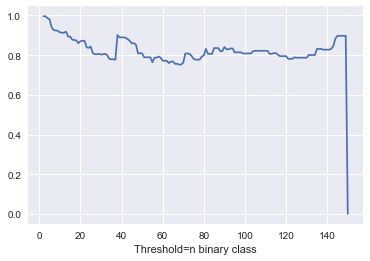

In [116]:
import matplotlib.pyplot as plt
%matplotlib inline
plotpred = np.zeros(151)
for threshold in range(2,150):
    for i,n in enumerate(df['Rank']):
        if n < threshold:
            rankmatrix[i] = 1
        else:
            rankmatrix[i] = 4
    predicted = cross_val_predict(model, logmatrix, rankmatrix, cv=10)
    plotpred[threshold] = metrics.accuracy_score(rankmatrix, predicted)
plt.plot(range(2,len(plotpred)),plotpred[2:])
plt.xlabel('Threshold=n binary class')
plt.ylabel('')


In [142]:
heatmap = np.hstack((logmatrix,df.Rank.as_matrix().reshape(517,1)))
heatmapdata = pd.DataFrame(heatmap)
correlation = heatmapdata.corr()

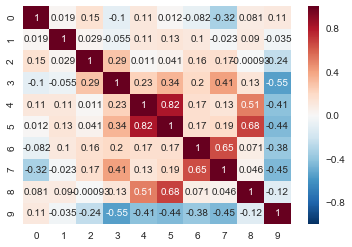

In [143]:
import seaborn as sns
sns.heatmap(correlation, annot=True)

In [124]:
from sklearn.linear_model import LinearRegression
regr = LinearRegression()
scores = cross_val_score(regr,logmatrix[:,0:2],df['Rank'], cv=10)
predicted = cross_val_predict(regr, logmatrix[:,0:2], df['Rank'], cv=10)
print(r2_score(df['Rank'], predicted))
print(scores)

-0.0101806905243
[-0.26848009 -0.15662269 -0.07068911 -0.07896072  0.00657649 -0.00391222
 -0.03722005  0.03699358  0.0087829  -0.0714548 ]


In [125]:
scores = cross_val_score(regr,logmatrix[:,3:8],df['Rank'], cv=10)
predicted = cross_val_predict(regr, logmatrix[:,3:8], df['Rank'], cv=10)
print(r2_score(df['Rank'], predicted))
print(scores)

0.379966528317
[ 0.194211    0.31455066  0.30152096  0.33007574  0.36798446  0.26720298
  0.2429535   0.66746027  0.21220328  0.6267109 ]


In [126]:
df.sort_values('Rank')

,Unnamed: 0,Name,Age,Birthday,Height,Weight,Rank,Country Represent,Year Turned Pro,Wins,Losses,Handed,Backhand Style,Number of Coaches
229,797,Jordi Samper-Montana,31,1986.06.03,185,188.0,1,"Manacor, Mallorca, Spain",2001.0,873,185,Left-Handed,One-Handed Backhand,2
2,7,Rafael Nadal,31,1986.06.03,185,188.0,1,"Manacor, Mallorca, Spain",2001.0,873,185,Left-Handed,Two-Handed Backhand,2
42,85,Mikhail Youzhny,31,1986.06.03,185,188.0,1,"Manacor, Mallorca, Spain",2001.0,873,185,Left-Handed,Two-Handed Backhand,2
82,163,Nicolas Almagro,31,1986.06.03,185,188.0,1,"Manacor, Mallorca, Spain",2001.0,873,185,Left-Handed,Two-Handed Backhand,2
359,3053,Yannick Hanfmann,31,1986.06.03,185,188.0,1,"Manacor, Mallorca, Spain",2001.0,873,185,Left-Handed,Two-Handed Backhand,2
134,327,John Isner,31,1986.06.03,185,188.0,1,"Manacor, Mallorca, Spain",2001.0,873,185,Left-Handed,Two-Handed Backhand,2
422,4945,Ryan James Storrie,31,1986.06.03,185,188.0,1,"Manacor, Mallorca, Spain",2001.0,873,185,Left-Handed,Two-Handed Backhand,2
231,801,Norbert Gombos,26,1991.05.16,191,176.0,3,"Haskovo, Bulgaria",2008.0,257,161,Right-Handed,Two-Handed Backhand,1
78,156,Novak Djokovic,26,1991.05.16,191,176.0,3,"Haskovo, Bulgaria",2008.0,257,161,Right-Handed,One-Handed Backhand,1
38,78,Roberto Bautista Agut,26,1991.05.16,191,176.0,3,"Haskovo, Bulgaria",2008.0,257,161,Right-Handed,One-Handed Backhand,1
